Below is code with a link to a happy or sad dataset which contains 80 images, 40 happy and 40 sad. 
Create a convolutional neural network that trains to 100% accuracy on these images,  which cancels training upon hitting training accuracy of >.999

Hint -- it will work best with 3 convolutional layers.

In [1]:
import tensorflow as tf
import os
import zipfile
from os import path, getcwd, chdir
import random
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop

# DO NOT CHANGE THE LINE BELOW. If you are developing in a local
# environment, then grab happy-or-sad.zip from the Coursera Jupyter Notebook
# and place it inside a local folder and edit the path to that location
path = f"{getcwd()}/../tmp2/happy-or-sad.zip"

zip_ref = zipfile.ZipFile(path, 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()

In [2]:
tr_h_dir = os.path.join('/tmp/h-or-s/happy')
tr_s_dir = os.path.join('/tmp/h-or-s/sad')
tr_h_files = os.listdir(tr_h_dir)
tr_s_files = os.listdir(tr_s_dir)

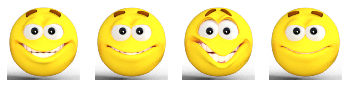

In [4]:
nos = 4
chosen_pict = random.sample(tr_h_files, nos)
fig, ax1 = plt.subplots(1, 4, figsize=(6, 2))
for n, img_name in enumerate(chosen_pict):
    im_file = os.path.join(tr_h_dir, img_name)
    im = plt.imread(im_file)
    ax1[n].imshow(im)
    ax1[n].axis('off')
plt.show()

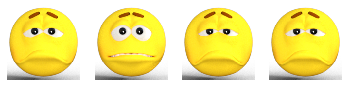

In [5]:
nos = 4
chosen_pict = random.sample(tr_s_files, nos)
fig, ax2 = plt.subplots(1, 4, figsize=(6, 2))
for n, img_name in enumerate(chosen_pict):
    im_file = os.path.join(tr_s_dir, img_name)
    im = plt.imread(im_file)
    ax2[n].imshow(im)
    ax2[n].axis('off')
plt.show()

In [6]:
# GRADED FUNCTION: train_happy_sad_model
def train_happy_sad_model():
    # Please write your code only where you are indicated.
    # please do not remove # model fitting inline comments.

    DESIRED_ACCURACY = 0.999

    class myCallback(tf.keras.callbacks.Callback):
        # Your Code
        def on_epoch_end(self, epoch, logs={}):
            if (logs.get('acc')>.999):
                print('\nReached 99.9% accuracy so cancelling training!')
                self.model.stop_training = True
                
            
    callbacks = myCallback()
    
    # This Code Block should Define and Compile the Model. Please assume the images are 150 X 150 in your implementation.
    model = tf.keras.models.Sequential([
        # Your Code Here
        Input(shape=(150, 150, 3)),
        Conv2D(16, 3, padding='same', activation='relu'),
        MaxPooling2D(2),
        Conv2D(32, 3, padding='same', activation='relu'),
        MaxPooling2D(2),
        Conv2D(64, 3, padding='same', activation='relu'),
        MaxPooling2D(2),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(1, activation='sigmoid')        
    ])


    model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['accuracy'])
           

    # This code block should create an instance of an ImageDataGenerator called train_datagen 
    # And a train_generator by calling train_datagen.flow_from_directory

    from tensorflow.keras.preprocessing.image import ImageDataGenerator

    train_datagen = ImageDataGenerator(rescale = 1 / 255)

    # Please use a target_size of 150 X 150.
    train_generator = train_datagen.flow_from_directory(
        # Your Code Here)
    # Expected output: 'Found 80 images belonging to 2 classes'
        '/tmp/h-or-s',
        target_size=(150, 150),
        batch_size=8,
        class_mode='binary')

    # This code block should call model.fit_generator and train for
    # a number of epochs.
    # model fitting
    history = model.fit_generator(
          # Your Code Here)
        train_generator,
        steps_per_epoch = 10,
        epochs = 10,
        verbose = 2,
        callbacks = [callbacks])
    # model fitting
    return history.history['acc'][-1]

In [7]:
# The Expected output: "Reached 99.9% accuracy so cancelling training!""
train_happy_sad_model()

W1029 15:10:37.300076 139668006352704 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1029 15:10:37.751340 139668006352704 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Found 80 images belonging to 2 classes.
Epoch 1/10
10/10 - 8s - loss: 2.3932 - acc: 0.4750
Epoch 2/10
10/10 - 0s - loss: 0.4829 - acc: 0.8500
Epoch 3/10
10/10 - 0s - loss: 0.2655 - acc: 0.9000
Epoch 4/10
10/10 - 0s - loss: 0.1453 - acc: 0.9375
Epoch 5/10
10/10 - 0s - loss: 0.1421 - acc: 0.9500
Epoch 6/10
10/10 - 1s - loss: 0.0476 - acc: 0.9875
Epoch 7/10

Reached 99.9% accuracy so cancelling training!
10/10 - 0s - loss: 0.0252 - acc: 1.0000


1.0

In [8]:
%%javascript
<!-- Save the notebook -->
IPython.notebook.save_checkpoint();

<IPython.core.display.Javascript object>

In [ ]:
%%javascript
IPython.notebook.session.delete();
window.onbeforeunload = null
setTimeout(function() { window.close(); }, 1000);

<IPython.core.display.Javascript object>